# **Project 2**, MIE1626
**Data Science Methods and Statistical Learning**

**Academic Integrity**

This is an individual project. Do not share your code with others, or post any parts of your work online. You can only submit code that is produced by you. If you use any online resource for developing parts of your code, you must explicitly acknowledge the source in a comment in your code. Students suspected of plagiarism on the project will be referred to the university for formal discipline according to the regulations.

**Please note that late submissions receive a penalty (or a mark of 0) as per syllabus.**

Please fill out the following:

• Full Name: Mengyang Liu


• Student Number: 1006702739


• UTorID: liumen78



**Three submission files are required:**

For submitting this project, three files must be submitted on Quercus by the project deadline:

1) The complete Jupyter file (in .ipynb format) (that completely compiles on Google colab without any errors regardless of the computer used.)

2) A self-contained and complete HTML printout of the same Jupyter file with all the output printed as well as all the code, text cells, comments, and figures.

3) Appendix pdf file of all prompts and all responses for all interactions you have had regarding this project with any AI assistant tool (Chat GPT etc.). If you do not use any AI assistant tool at all, this appendix pdf file is not needed.

### How to obtain an **HTML** file from an **IPYNB** file

1. Download the IPYNB file of your complete project: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of a new Colab session

3. Select & upload your `.ipynb` file you just downloaded, and then copy its path (right click) (you might need to hit the Refresh button before your file shows up)


4. Replace XXXX with the copied path and then execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html XXXX
```

5. An HTML version of your notebook will appear in the Colab session files and you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus (before the deadline) for grading.



More info on coverting IPYNB to HTML: https://stackoverflow.com/a/64487858



**Policy regarding the use of AI assistant tools**

If you use a generative AI tool (e.g., ChatGPT, GitHub Copilot, or any other similar tool) to get ideas and/or partial answers for projects or assignments or to generate any code and/or text, you must declare in your submission the tools that you have used and describe the usage, and include in your submission an appendix that captures all the interactions (prompts and responses).

You will not be penalized for the declared use of such AI assistant tools, and the grading decisions will be based on your original contributions as well as the efforts that you make to check and/or correct the answers provided by the tool. Students are ultimately accountable for the work they submit. Failure to fully declare the use of this tool will be considered "unauthorized assistance" and will have consequences (See B.I. of the [U of T CODE OF BEHAVIOUR ON ACADEMIC MATTERS](https://governingcouncil.utoronto.ca/secretariat/policies/code-behaviour-academic-matters-july-1-2019))

In [1]:
# Basic basic package to handle data.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

 # 0. Data Imported

In [2]:
# import sentiment_analysis.csv as df_sa
df_sa = pd.read_csv('https://saref.github.io/teaching/MIE1626/sentiment_analysis.csv',low_memory=False)

print("Shape of sentiment_analysis.csv: ",df_sa.shape)
# 0 stands for negative and 1 stands for positive
# ID is useless in this sentiment analysis, so we drop this column
df_sa = df_sa[['text','label']]
print("Revised Shape of sentiment_analysis.csv: ",df_sa.shape)
df_sa.head()

Shape of sentiment_analysis.csv:  (100000, 3)
Revised Shape of sentiment_analysis.csv:  (100000, 2)


,text,label
0,Josh Jenkins is looking forward to TAB Breeder...,1
1,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,"RT @PEPalerts: This September, @YESmag is taki...",1
3,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,RT @CedricFeschotte: Excited to announce: as o...,1


In [3]:
# import Canadian_elections_2021.csv as df_ce
df_ce = pd.read_csv('https://saref.github.io/teaching/MIE1626/Canadian_elections_2021.csv',low_memory=False)
print("Shape of Canadian_elections_2021.csv: ",df_ce.shape)
df_ce.head()

Shape of Canadian_elections_2021.csv:  (1002, 3)


,text,sentiment,negative_reason
0,The Canadian election is a power grab by PM Tr...,negative,calling election early
1,I do hope Trudeau loses the Canadian election ...,negative,covid
2,"Dear Canadians, This election is a test of how...",positive,NaN
3,Canadian friends: Never forget that Trudeau ha...,negative,calling election early
4,Sorry @theJagmeetSingh I have voted #NDP all m...,positive,NaN


# **1. Data cleaning (10 Marks)**  
The tweets, as given, are not in a form amenable to analysis – there is too much ‘noise’.  
Therefore, the first step is to “clean” the data. Design a procedure that prepares the Twitter data for analysis by satisfying the requirements below. Remember to use the same pipeline for both datasets.

*   All html tags and attributes (i.e., /<[^>]+>/) are removed.
*   Html character codes (i.e., &...;) are replaced with an ASCII equivalent.
*   All URLs are removed.
*   All characters in the text are in lowercase.
*   All stop words are removed. Be clear in what you consider as a stop word.
*   If a tweet is empty after pre-processing, it should be preserved as such.





In [4]:
# Import Data Cleaning related package
import re
import html
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\frank\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\frank\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
import nltk
nltk.download('punkt_tab')
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # Emoticons
        "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        "\U0001F1E0-\U0001F1FF"  # Flags (iOS)
        "\U00002500-\U00002BEF"  # Chinese characters
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "\U0001f926-\U0001f937"
        "\U00010000-\U0010FFFF"
        "\u2640-\u2642"
        "\u2600-\u2B55"
        "\u200d"
        "\u23cf"
        "\u23e9"
        "\u231a"
        "\ufe0f"  # Dingbats
        "\u3030"
        "]+",
        flags=re.UNICODE,)

    return emoji_pattern.sub(r'', text)

def data_clean(tweet):
    # Remove URLs and punctuation
    tweet['text'] = tweet['text'].str.replace(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', regex=True)
    tweet['text'] = tweet['text'].str.replace(r'[^\w\s]', '', regex=True)

    # Remove emojis
    tweet['text'] = tweet['text'].apply(remove_emojis)

    # Strip HTML and convert HTML codes to ASCII
    tweet['text'] = tweet['text'].apply(lambda x: BeautifulSoup(x, 'lxml').get_text())
    tweet['text'] = tweet['text'].apply(lambda x: html.unescape(x))

    # Convert text to lowercase
    tweet['text'] = tweet['text'].str.lower()

    # Tokenize text
    tweet['text'] = tweet['text'].apply(word_tokenize)

    # Remove stop words
    stop = stopwords.words('english')
    tweet['text'] = tweet['text'].apply(lambda x: [item for item in x if item not in stop])

    # Apply stemming to tokenized sentences and join tokens back into a single string
    stemmer = PorterStemmer()
    tweet['text'] = tweet['text'].apply(lambda x: [stemmer.stem(y) for y in x])
    tweet['text'] = tweet['text'].apply(lambda x: ' '.join(x))

    return tweet

# Apply the data_clean function to the entire DataFrame
df_ce = data_clean(df_ce)
df_sa = data_clean(df_sa)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\frank\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [6]:
df_ce.head()

,text,sentiment,negative_reason
0,canadian elect power grab pm trudeau ye take a...,negative,calling election early
1,hope trudeau lose canadian elect tomorrow call...,negative,covid
2,dear canadian elect test progress whether stan...,positive,NaN
3,canadian friend never forget trudeau 2 year ma...,negative,calling election early
4,sorri thejagmeetsingh vote ndp life elect figh...,positive,NaN


In [7]:
# Remove "rt" in each line in case they are useless to our study
df_sa['text'] = df_sa['text'].str.replace(r'rt', '', case=False, regex=True)
df_sa.head()

,text,label
0,josh jenkin look forward tab breeder crown sup...,1
1,mianusmanjav congratul pakistan becom no1test...,1
2,pepale septemb yesmag take main mendoza surpr...,1
3,david_gaibi newli paint wall thank million cu...,1
4,cedricfeschott excit announc juli 2017 fescho...,1


# **2. Exploratory analysis (15 marks)**  
1. Design a simple procedure that determines the political party (Liberal, Conservative, New Democratic Party (NDP), The People's Party of Canada (PPC)) of a given tweet and apply this procedure to all the tweets in the Canadian Elections dataset. A suggestion would be to look at relevant words and hashtags in the tweets that correspond to certain political parties or candidates. What can you say about the distribution of the political affiliations of the tweets?  

2. Present a graphical figure (e.g. chart, graph, histogram, boxplot, word cloud, etc.) that visualizes some aspect of the generic tweets in sentiment_analysis.csv and another figure for the 2021 Canadian Elections tweets. All graphs and plots should be readable and have all axes that are appropriately labelled. Discuss your findings.

In [8]:
# import package related to Exploratory analysis
from wordcloud import WordCloud
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
# your code starts from here.
relevant_words = {
    'Liberal': ['liberal', 'justin', 'trudeau', 'teamtrudeau', 'lib', 'support lib', 'voteliberal', 'voteliber', 'votetrudeau'],
    'Conservative': ['conservative', 'otoole', 'teamotoole', 'erin ottole', 'support conservative', 'support con', 'voteconservative', 'vote con', 'conserv'],
    'NDP': ['votendp', 'ndp', 'democrat', 'jagmeet', 'votejagmeet', 'support ndp', 'jagmeetsingh', 'teamjagmeet'],
    'PPC': ['ppc', 'vote ppc', 'maxime', 'maxime bernier', 'purple', "people's party", 'teammaxime', 'support ppc', 'voteppc', 'freedom'],
}

def party_vote(tweet):
    for party, party_keywords in relevant_words.items():
      if any(keyword in tweet for keyword in party_keywords):
          return party
    return 'not detected'

vote = df_ce['text'].apply(party_vote)
votedata = vote.value_counts()

votedata


text
Liberal         489
not detected    324
Conservative     96
PPC              62
NDP              31
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

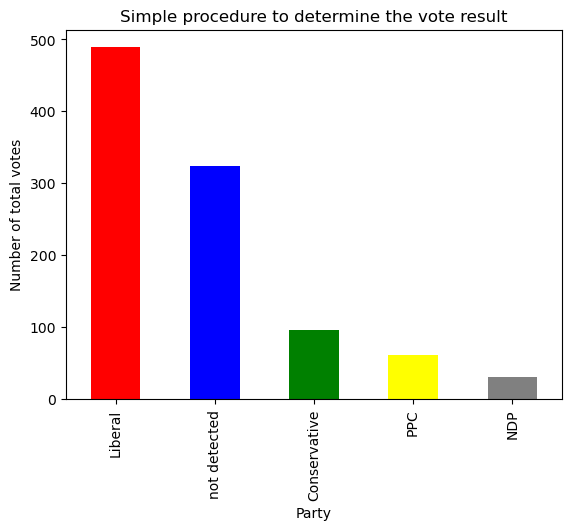

In [10]:
votedata.plot(kind = 'bar', color =['red', 'blue', 'green', 'yellow', 'gray'])
plt.title('Simple procedure to determine the vote result')
plt.xlabel("Party")
plt.ylabel("Number of total votes")
plt.show

The histogram shows my simple method's result with a very high proportion of liberal party. The "not detected" category is also very high which is expected as my categorical method is too simple. By the wordcloud below, I could get a better understanding on the keywords of each category based on my model.

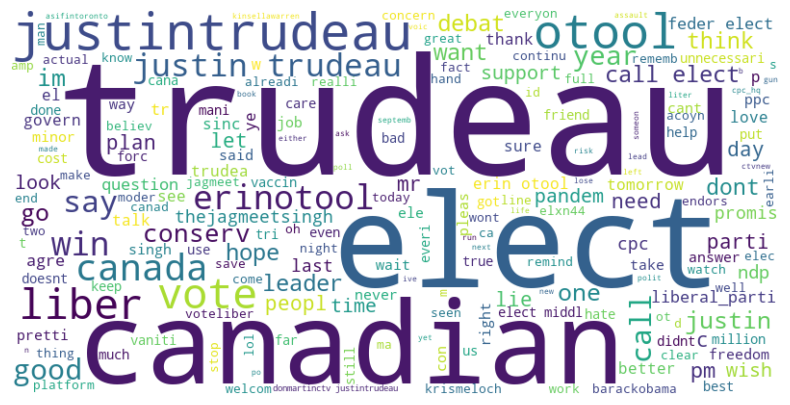

In [11]:
liberal_indices = vote[vote.str.contains('Liberal', case=False)].index.tolist()
df_ce_lib = df_ce.iloc[liberal_indices]

wordcloudlib = WordCloud(width=800, height=400, background_color='white').generate(df_ce_lib['text'].to_string())
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudlib, interpolation='bilinear')
plt.axis('off')
plt.show()

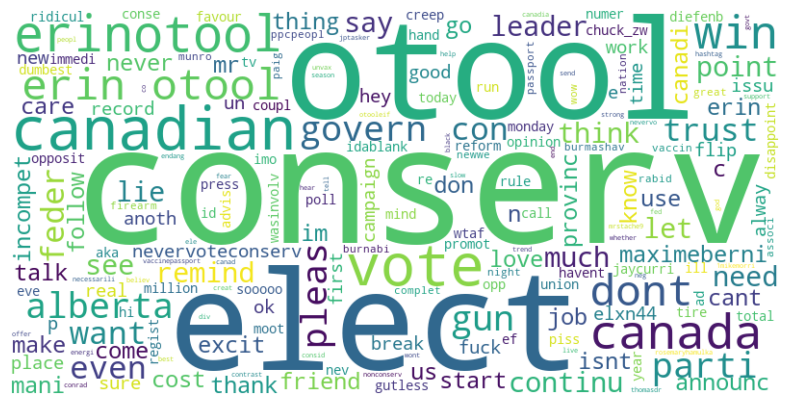

In [12]:
Con_indices = vote[vote.str.contains('Conservative', case=False)].index.tolist()
df_ce_con = df_ce.iloc[Con_indices]

wordcloudcon = WordCloud(width=800, height=400, background_color='white').generate(df_ce_con['text'].to_string())
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudcon, interpolation='bilinear')
plt.axis('off')
plt.show()

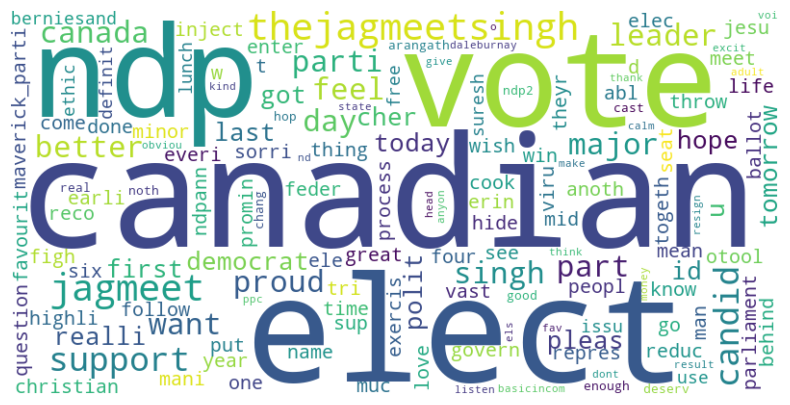

In [13]:
ndp_indices = vote[vote.str.contains('NDP', case=False)].index.tolist()
df_ce_ndp = df_ce.iloc[ndp_indices]

wordcloudndp = WordCloud(width=800, height=400, background_color='white').generate(df_ce_ndp['text'].to_string())
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudndp, interpolation='bilinear')
plt.axis('off')
plt.show()

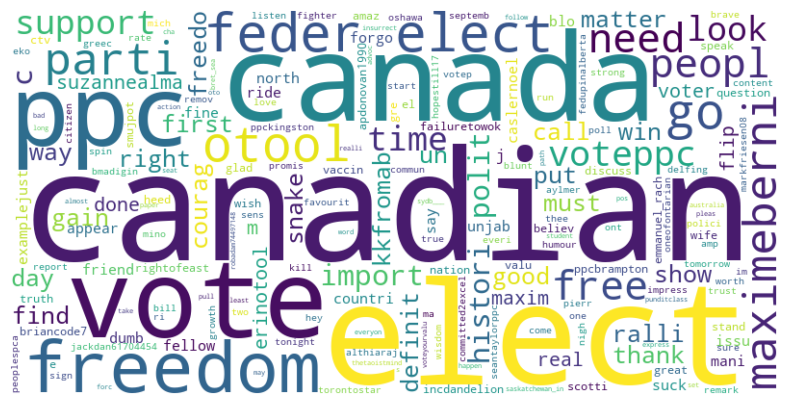

In [14]:
ppc_indices = vote[vote.str.contains('PPC', case=False)].index.tolist()
df_ce_ppc = df_ce.iloc[ppc_indices]

wordcloudppc = WordCloud(width=800, height=400, background_color='white').generate(df_ce_ppc['text'].to_string())
plt.figure(figsize=(10, 5))
plt.imshow(wordcloudppc, interpolation='bilinear')
plt.axis('off')
plt.show()

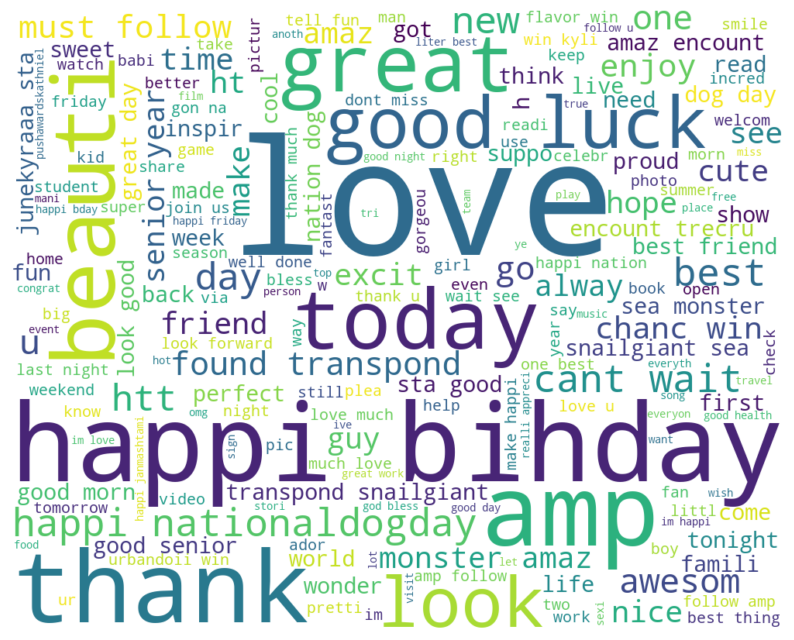

In [15]:
# Have a look at the word cloud of the generic tweets in sentiment_analysis

# For positive sentiment
wordcloudsa = WordCloud(width=1000, height=800, background_color='white').generate(df_sa.loc[df_sa['label']==1].to_string())
plt.figure(figsize=(10, 10))
plt.imshow(wordcloudsa, interpolation='bilinear')
plt.axis('off')
plt.show()

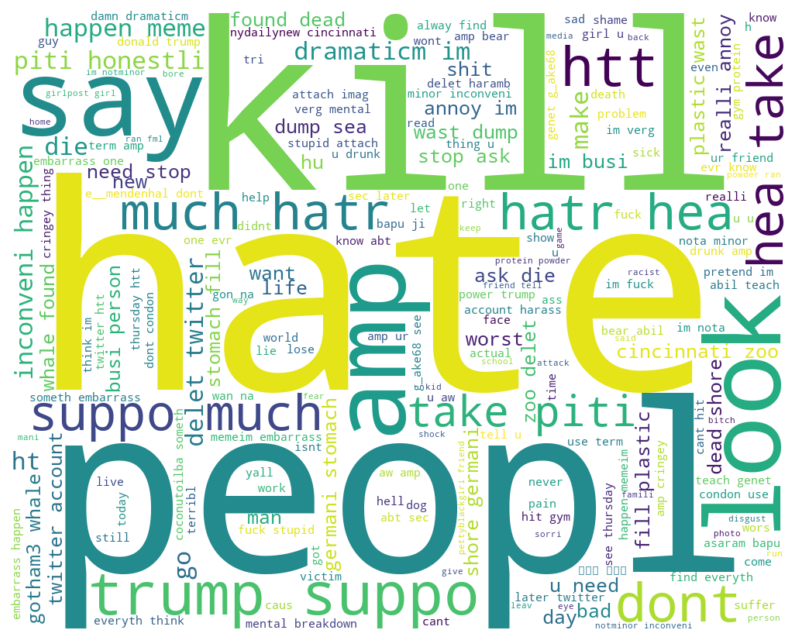

In [16]:
# For negative sentiment
wordcloudsa = WordCloud(width=1000, height=800, background_color='white').generate(df_sa.loc[df_sa['label']==0].to_string())
plt.figure(figsize=(10, 10))
plt.imshow(wordcloudsa, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
# Histogram for the top words used based on my simple model for Canadian Electration 2021 data
def display_top_words(text, n):
    # Initialize CountVectorizer to count word frequencies
    vectorizer = CountVectorizer(stop_words='english', max_features=n)
    word_count_matrix = vectorizer.fit_transform(text)

    # Sum the word counts and get the total count for each word
    total_word_counts = word_count_matrix.sum(axis=0)
    word_frequencies = [(word, total_word_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()] # Create a list of (word, count) pairs

    # Sort the list by count in descending order (base on the frequency)
    word_frequencies.sort(key=lambda x: x[1], reverse=True)

    # Convert the list to a DataFrame for easier viewing
    top_words_df = pd.DataFrame(word_frequencies, columns=['Word', 'Frequency'])

    return top_words_df

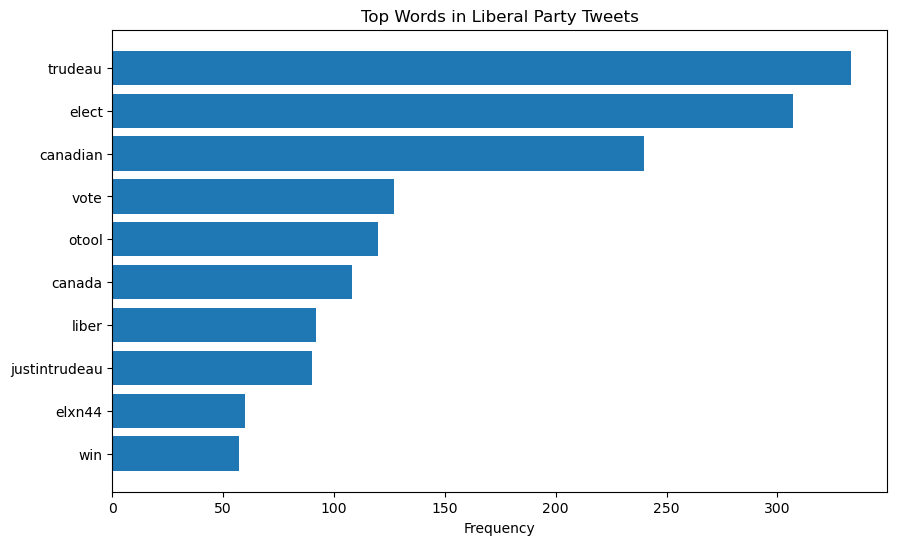

In [18]:
df_words_party = display_top_words(df_ce_lib['text'], n=10)
plt.figure(figsize=(10, 6))
plt.barh(df_words_party['Word'], df_words_party['Frequency'])
plt.xlabel('Frequency')
plt.title('Top Words in Liberal Party Tweets')
plt.gca().invert_yaxis()
plt.show()

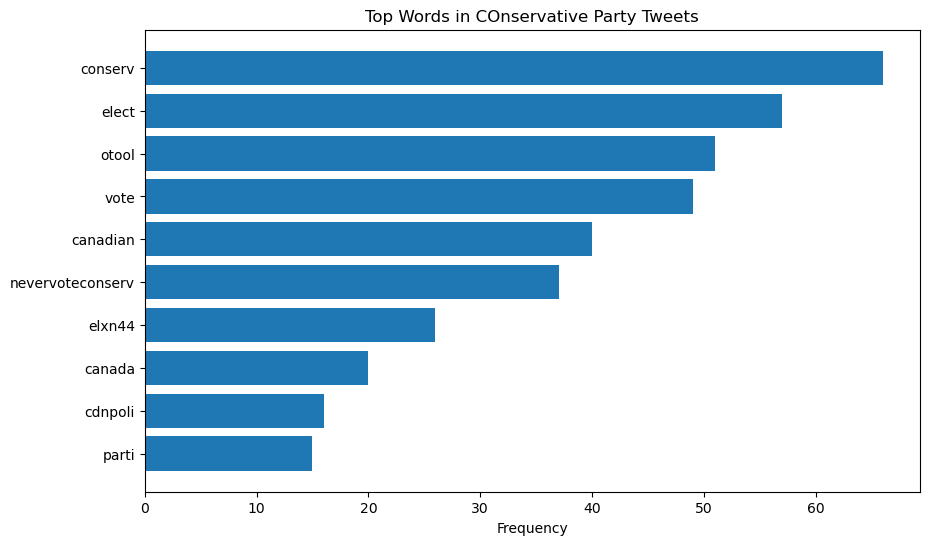

In [19]:
df_words_party = display_top_words(df_ce_con['text'], n=10)
plt.figure(figsize=(10, 6))
plt.barh(df_words_party['Word'], df_words_party['Frequency'])
plt.xlabel('Frequency')
plt.title('Top Words in COnservative Party Tweets')
plt.gca().invert_yaxis()
plt.show()

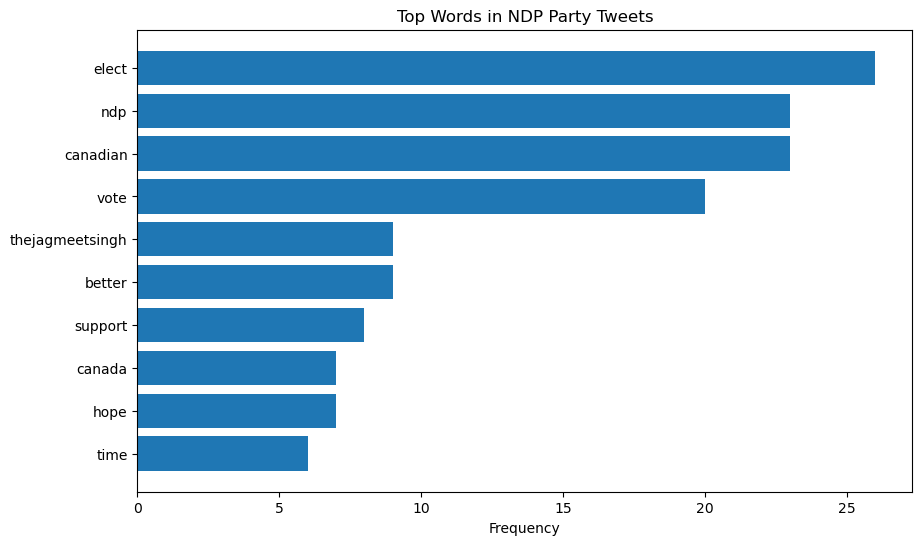

In [20]:
df_words_party = display_top_words(df_ce_ndp['text'], n=10)
plt.figure(figsize=(10, 6))
plt.barh(df_words_party['Word'], df_words_party['Frequency'])
plt.xlabel('Frequency')
plt.title('Top Words in NDP Party Tweets')
plt.gca().invert_yaxis()
plt.show()

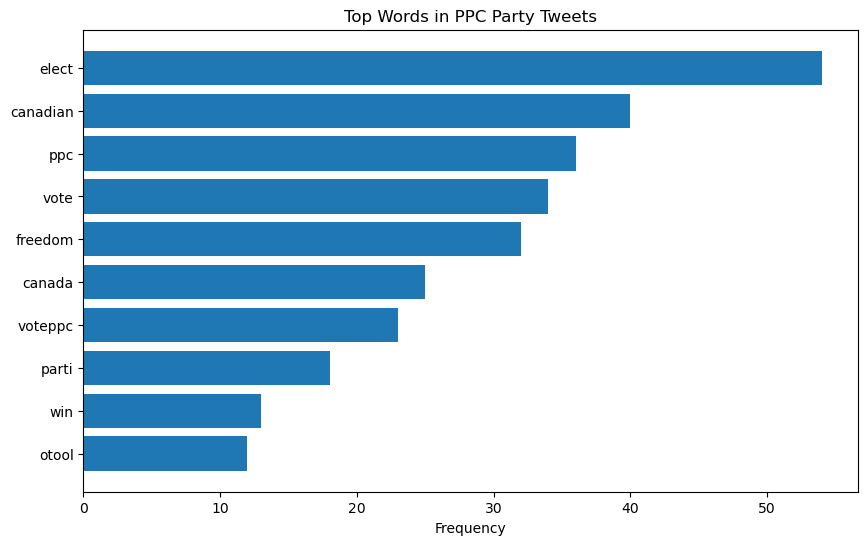

In [21]:
df_words_party = display_top_words(df_ce_ppc['text'], n=10)
plt.figure(figsize=(10, 6))
plt.barh(df_words_party['Word'], df_words_party['Frequency'])
plt.xlabel('Frequency')
plt.title('Top Words in PPC Party Tweets')
plt.gca().invert_yaxis()
plt.show()

By observation, there are many similar words be considered as keywords for affiliation. Also, some of the keywords for the parties may not all represent postive sign for voting such party. For example, if a tweet include the word "trudeau", it can be a tweet that against the Liberal Party instead of supporting Justin Truduea. This idea indicates the potential drawbacks for my simple categorical model. The amount of unknowns is also high since some tweets don't have the keywords I give and do not necessarily imply a political affiliation. The distribution for now is not that clear and with uncertainty.

# **3. Model preparation (15 marks)**  
Split the generic tweets randomly into training data (80%) and test data 20%).  
Prepare the data to try seven classification algorithms – logistic regression, k-NN, Naive Bayes, SVM, decision trees, Random Forest and XGBoost, where each tweet is considered a single observation/example. In these models, the target variable is the sentiment value, which is either positive or negative. Try the five different types of features, Bag of Words (word frequency), TF-IDF, Word2Vec embedding, BERT [cls] embedding, and N-grams on all 7 models. (Hint: Be careful about when to split the dataset into training and testing sets.)

In [22]:
# import package related to Model Preparation
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel

c:\Users\frank\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [23]:
# Data splitting
df_sa_3 = df_sa.copy()
y = df_sa_3['label']

X_train, X_test, y_train, y_test = train_test_split(df_sa_3, y, test_size = 0.2, random_state=1)

In [24]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(80000, 2) (80000,) (20000, 2) (20000,)


In [25]:
# Prepare for Bag of Words
def BoW(X_train, X_test):
    # Initialize CountVectorizer
    vectorizer = CountVectorizer()

    # Fit the vectorizer on the training data and transform
    X_train_bow = vectorizer.fit_transform(X_train['text'])

    # Ensures that the test data is transformed using the same parameters learned from the training data
    X_test_bow = vectorizer.transform(X_test['text'])
    return X_train_bow, X_test_bow

# X_train_bow, X_test_bow = BoW(X_train, X_test)
X_train_reduced_bow, X_test_reduced_bow = BoW(X_train, X_test)


# # To perform SVD for dimensional reduction
# svd = TruncatedSVD(n_components=1000`)  # Start with a high number of components
# svd.fit(X_train_bow)

# # Calculate cumulative explained variance
# cumulative_variance = svd.explained_variance_ratio_.cumsum()

# # Plot cumulative explained variance
# plt.plot(cumulative_variance)
# plt.xlabel("Number of Components")
# plt.ylabel("Cumulative Explained Variance")
# plt.title("Explained Variance vs. Components")
# plt.grid()
# plt.show()

# # Check if 95% variance is reached
# if any(cumulative >= 0.95 for cumulative in cumulative_variance):
#     n_components_95 = next(i for i, cumulative in enumerate(cumulative_variance) if cumulative >= 0.95)
#     print("Number of components to retain 95% variance:", n_components_95)
# else:
#     print("95% variance not reached. Maximum cumulative variance:", cumulative_variance[-1])
# svd = TruncatedSVD(n_components=550) # The tuned n_component to represent 95% variance is 550
# X_train_reduced_bow = svd.fit_transform(X_train_bow)
# X_test_reduced_bow = svd.transform(X_test_bow)

In [26]:
# Prepare fo TF-IDF
def TF(X_train, X_test):
    tfidf_vectorizer = TfidfVectorizer()
    X_train_tf = tfidf_vectorizer.fit_transform(X_train['text'])
    X_test_tf = tfidf_vectorizer.transform(X_test['text'])
    return X_train_tf, X_test_tf

# X_train_tfidf, X_test_tfidf = TF(X_train, X_test)
X_train_reduced_tf, X_test_reduced_tf = BoW(X_train, X_test)

# # To perform SVD for dimensional reduction
# svd = TruncatedSVD(n_components=1000)  # Start with a high number of components
# svd.fit(X_train_tfidf)

# # Calculate cumulative explained variance
# cumulative_variance = svd.explained_variance_ratio_.cumsum()

# # Plot cumulative explained variance
# plt.plot(cumulative_variance)
# plt.xlabel("Number of Components")
# plt.ylabel("Cumulative Explained Variance")
# plt.title("Explained Variance vs. Components")
# plt.grid()
# plt.show()

# # Check if 95% variance is reached
# if any(cumulative >= 0.95 for cumulative in cumulative_variance):
#     n_components_95 = next(i for i, cumulative in enumerate(cumulative_variance) if cumulative >= 0.95)
#     print("Number of components to retain 95% variance:", n_components_95)
# else:
#     print("95% variance not reached. Maximum cumulative variance:", cumulative_variance[-1])
# svd = TruncatedSVD(n_components=659) # The tuned n_component to represent 95% variance is 659
# X_train_reduced_tf = svd.fit_transform(X_train_tfidf)
# X_test_reduced_tf = svd.transform(X_test_tfidf)

In [27]:
# Prepare fo Word2Vec
def Word2vec(X_train, X_test, vector_size=100, window=5, min_count=1): # Set dimension 100, size of context is 5, minimum number of times a word must appear is 1

    # Train Word2Vec on the tokenized training text
    tokenized_train = [doc.split() for doc in X_train['text']]
    model = Word2Vec(tokenized_train, vector_size=vector_size, window=window, min_count=min_count)

    # Compute average Word2Vec vectors for a document
    def document_vector(doc):
        words = [word for word in doc.split() if word in model.wv.key_to_index]
        return np.mean([model.wv[word] for word in words], axis=0) if words else np.zeros(vector_size)

    # Convert training and test text to document vectors
    X_train_vectors = np.array([document_vector(doc) for doc in X_train['text']])
    X_test_vectors = np.array([document_vector(doc) for doc in X_test['text']])

    return X_train_vectors, X_test_vectors

X_train_Word2Vec, X_test_Word2Vec = Word2vec(X_train, X_test, vector_size=100, window=5, min_count=1)

In [28]:
# Prepare for BERT
import torch
from transformers import BertTokenizer, BertModel

def bert(X_train, X_test, bert_model_name='bert-base-uncased'):
    # Helper function to generate embeddings for a batch of text
    def generate_bert_embeddings(texts, batch_size=16):
        # Load pre-trained BERT tokenizer and model
        tokenizer = BertTokenizer.from_pretrained(bert_model_name)
        model = BertModel.from_pretrained(bert_model_name)

        # Check if CUDA (GPU) is available
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        model.to(device)
        model.eval()  # Set model to evaluation mode

        embeddings = []
        for i in range(0, len(texts), batch_size):
            batch_texts = texts[i:i + batch_size]

            # Tokenize the input text
            inputs = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True, max_length=512)
            inputs = {key: value.to(device) for key, value in inputs.items()}  # Move inputs to device

            with torch.no_grad():
                # Forward pass through the model
                outputs = model(**inputs)

            # Extract [CLS] token embeddings
            cls_embeddings = outputs.last_hidden_state[:, 0, :]  # Use the [CLS] token embedding
            embeddings.append(cls_embeddings.cpu())  # Move to CPU and store

        # Concatenate all batches into one tensor
        return torch.cat(embeddings, dim=0).numpy()

    # Generate embeddings for the training and test data
    X_train_embeddings = generate_bert_embeddings(X_train['text'].tolist())
    X_test_embeddings = generate_bert_embeddings(X_test['text'].tolist())

    return X_train_embeddings, X_test_embeddings

X_train_bert, X_test_bert = bert(X_train, X_test)

KeyboardInterrupt: 

In [ ]:
# Class Notes
# !pip install -U tensorflow-text==2.15.0

# import tensorflow as tf

# import tensorflow_hub as hub

# import tensorflow_text as text

# bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
# bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")# 'pooled_ouput' refers to the [cls] output embedding
# # def get_sentence_embedding(sentences):
# #     preprocessed_text = bert_preprocess(sentences)
# #     return bert_encoder(preprocessed_text)['pooled_output']

# # # Get the [cls] embedding for each sentence
# # get_sentence_embedding

In [ ]:
# Prepare fo N-grams
def NG(X_train, X_test):
    Ngram_vectorizer = CountVectorizer(ngram_range=(1, 2)) # specifies the range of n-grams that will be extracted from the text during feature extraction.
    X_train_ng = Ngram_vectorizer.fit_transform(X_train['text'])
    X_test_ng = Ngram_vectorizer.transform(X_test['text'])
    return X_train_ng, X_test_ng

# X_train_ng, X_test_ng = NG(X_train, X_test)
X_train_reduced_ng, X_test_reduced_ng = NG(X_train, X_test)
# # To perform SVD for dimensional reduction
# svd = TruncatedSVD(n_components=1000)  # Start with a high number of components
# svd.fit(X_train_ng)

# # Calculate cumulative explained variance
# cumulative_variance = svd.explained_variance_ratio_.cumsum()

# # Plot cumulative explained variance
# plt.plot(cumulative_variance)
# plt.xlabel("Number of Components")
# plt.ylabel("Cumulative Explained Variance")
# plt.title("Explained Variance vs. Components")
# plt.grid()
# plt.show()

# # Check if 95% variance is reached
# if any(cumulative >= 0.95 for cumulative in cumulative_variance):
#     n_components_95 = next(i for i, cumulative in enumerate(cumulative_variance) if cumulative >= 0.95)
#     print("Number of components to retain 95% variance:", n_components_95)
# else:
#     print("95% variance not reached. Maximum cumulative variance:", cumulative_variance[-1])
# svd = TruncatedSVD(n_components=653) # The tuned n_component to represent 95% variance is 653
# X_train_reduced_ng = svd.fit_transform(X_train_ng)
# X_test_reduced_ng = svd.transform(X_test_ng)

Comment: I have commented may lines of code which are originally used to perform dimensional reduction. They were useful when I train model using df_ce, but not df_sa. In this case, I choose to keep them as comment.

# **4. Model implementation and tuning (60 marks)**

**4.1)** Using five types of features (Bag of Words, TF-IDF, Word2Vec embeddings, BERT [cls] embedding, and N-grams), train models on the training data from generic tweets and apply the model to the test data to obtain an accuracy value.

**a.** Evaluate the trained model with the best performance on the Canadian Elections data. How well do your predictions match the sentiment labelled in the Canadian elections data?

In [ ]:
import time

# import modelization related packages
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
def Acc(y_test, y_pred, y_pred_probs):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = accuracy_score(y_test, y_pred)
    metrics = {
        "true_positives": tp,
        "false_positives": fp,
        "true_negatives": tn,
        "false_negatives": fn,
        "accuracy": accuracy,
    }

    return metrics

In [ ]:
# # logistic regression BoW
# y_train = y_train.astype(int)
# y_test = y_test.astype(int)

# lm = LogisticRegression()
# lm.fit(X_train_reduced_bow, y_train)
# y_pred = lm.predict(X_test_reduced_bow)
# y_pred_probs = lm.predict_proba(X_test_reduced_bow)[::,1]
# Acc(y_test, y_pred, y_pred_probs)


In [ ]:
# # logistic regression TF-IDF
# y_train = y_train.astype(int)
# y_test = y_test.astype(int)

# lm = LogisticRegression()
# lm.fit(X_train_reduced_tf, y_train)
# y_pred = lm.predict(X_test_reduced_tf)
# y_pred_probs = lm.predict_proba(X_test_reduced_tf)[::,1]
# Acc(y_test, y_pred, y_pred_probs)

In [ ]:
# # logistic regression Word2vec
# y_train = y_train.astype(int)
# y_test = y_test.astype(int)

# lm = LogisticRegression(class_weight='balanced') # Adjust the weight for each class in Logistic Regression
# lm.fit(X_train_Word2Vec, y_train)
# y_pred = lm.predict(X_test_Word2Vec)
# y_pred_probs = lm.predict_proba(X_test_Word2Vec)[::,1]
# Acc(y_test, y_pred, y_pred_probs)

In [ ]:
# # logistic regression Bert
# y_train = y_train.astype(int)
# y_test = y_test.astype(int)

# lm = LogisticRegression() # Adjust the weight for each class in Logistic Regression
# lm.fit(X_train_bert, y_train)
# y_pred = lm.predict(X_test_bert)
# y_pred_probs = lm.predict_proba(X_test_bert)[::,1]
# Acc(y_test, y_pred, y_pred_probs)

In [ ]:
# # logistic regression N-grams
# y_train = y_train.astype(int)
# y_test = y_test.astype(int)

# lm = LogisticRegression() # Adjust the weight for each class in Logistic Regression
# lm.fit(X_train_reduced_ng, y_train)
# y_pred = lm.predict(X_test_reduced_ng)
# y_pred_probs = lm.predict_proba(X_test_reduced_ng)[::,1]
# Acc(y_test, y_pred, y_pred_probs)

In [ ]:
# Logistic regression
def evaluate_logistic(y_train, y_test):
    methods = ['BoW', 'TF-IDF', 'Word2Vec', 'BERT', 'N-grams']
    results = {}

    # Convert labels to integers
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)

    # 1. Bag of Words (BoW)
    lm = LogisticRegression()
    lm.fit(X_train_reduced_bow, y_train)
    y_pred = lm.predict(X_test_reduced_bow)
    y_pred_probs = lm.predict_proba(X_test_reduced_bow)[:, 1]
    results['BoW'] = Acc(y_test, y_pred, y_pred_probs)

    # 2. TF-IDF
    lm = LogisticRegression()
    lm.fit(X_train_reduced_tf, y_train)
    y_pred = lm.predict(X_test_reduced_tf)
    y_pred_probs = lm.predict_proba(X_test_reduced_tf)[:, 1]
    results['TF-IDF'] = Acc(y_test, y_pred, y_pred_probs)

    # 3. Word2Vec
    lm = LogisticRegression(class_weight='balanced')
    lm.fit(X_train_Word2Vec, y_train)
    y_pred = lm.predict(X_test_Word2Vec)
    y_pred_probs = lm.predict_proba(X_test_Word2Vec)[:, 1]
    results['Word2Vec'] = Acc(y_test, y_pred, y_pred_probs)

    # 4. BERT
    lm = LogisticRegression()
    lm.fit(X_train_bert, y_train)
    y_pred = lm.predict(X_test_bert)
    y_pred_probs = lm.predict_proba(X_test_bert)[:, 1]
    results['BERT'] = Acc(y_test, y_pred, y_pred_probs)

    # 5. N-grams
    lm = LogisticRegression()
    lm.fit(X_train_reduced_ng, y_train)
    y_pred = lm.predict(X_test_reduced_ng)
    y_pred_probs = lm.predict_proba(X_test_reduced_ng)[:, 1]
    results['N-grams'] = Acc(y_test, y_pred, y_pred_probs)

    return results

all_results = evaluate_logistic(y_train, y_test)
result_logistic = pd.DataFrame(all_results)
result_logistic

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,BoW,TF-IDF,Word2Vec,BERT,N-grams
true_positives,16773.0000,16773.0000,15056.0000,16379.0000,16793.00000
false_positives,205.0000,205.0000,262.0000,933.0000,232.00000
true_negatives,2915.0000,2915.0000,2858.0000,2187.0000,2888.00000
false_negatives,107.0000,107.0000,1824.0000,501.0000,87.00000
accuracy,0.9844,0.9844,0.8957,0.9283,0.98405


In [ ]:
#  K-NN
def evaluate_knn(y_train, y_test):
    methods = ['BoW', 'TF-IDF', 'Word2Vec', 'BERT', 'N-grams']
    results = {}

    # Convert labels to integers
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)

    # 1. Bag of Words (BoW)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_reduced_bow, y_train)
    y_pred = knn.predict(X_test_reduced_bow)
    y_pred_probs = knn.predict_proba(X_test_reduced_bow)[:, 1]
    results['BoW'] = Acc(y_test, y_pred, y_pred_probs)

    # 2. TF-IDF
    lm = KNeighborsClassifier(n_neighbors=5)
    lm.fit(X_train_reduced_tf, y_train)
    y_pred = lm.predict(X_test_reduced_tf)
    y_pred_probs = lm.predict_proba(X_test_reduced_tf)[:, 1]
    results['TF-IDF'] = Acc(y_test, y_pred, y_pred_probs)

    # 3. Word2Vec
    lm = KNeighborsClassifier(n_neighbors=5)
    lm.fit(X_train_Word2Vec, y_train)
    y_pred = lm.predict(X_test_Word2Vec)
    y_pred_probs = lm.predict_proba(X_test_Word2Vec)[:, 1]
    results['Word2Vec'] = Acc(y_test, y_pred, y_pred_probs)

    # 4. BERT
    lm = KNeighborsClassifier(n_neighbors=5)
    lm.fit(X_train_bert, y_train)
    y_pred = lm.predict(X_test_bert)
    y_pred_probs = lm.predict_proba(X_test_bert)[:, 1]
    results['BERT'] = Acc(y_test, y_pred, y_pred_probs)

    # 5. N-grams
    lm = KNeighborsClassifier(n_neighbors=5)
    lm.fit(X_train_reduced_ng, y_train)
    y_pred = lm.predict(X_test_reduced_ng)
    y_pred_probs = lm.predict_proba(X_test_reduced_ng)[:, 1]
    results['N-grams'] = Acc(y_test, y_pred, y_pred_probs)

    return results

all_results = evaluate_knn(y_train, y_test)
result_knn = pd.DataFrame(all_results)
result_knn

,BoW,TF-IDF,Word2Vec,BERT,N-grams
true_positives,16868.0000,16868.0000,16400.00000,16457.00000,16879.0000
false_positives,1720.0000,1720.0000,643.00000,1288.00000,2035.0000
true_negatives,1400.0000,1400.0000,2477.00000,1832.00000,1085.0000
false_negatives,12.0000,12.0000,480.00000,423.00000,1.0000
accuracy,0.9134,0.9134,0.94385,0.91445,0.8982


In [ ]:
# Naive bayes
def evaluate_nb(y_train, y_test):
    methods = ['BoW', 'TF-IDF', 'Word2Vec', 'BERT', 'N-grams']
    results = {}

    # Convert labels to integers
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)

    # 1. Bag of Words (BoW)
    lm = MultinomialNB()
    lm.fit(X_train_reduced_bow, y_train)
    y_pred = lm.predict(X_test_reduced_bow)
    y_pred_probs = lm.predict_proba(X_test_reduced_bow)[:, 1]
    results['BoW'] = Acc(y_test, y_pred, y_pred_probs)

    # 2. TF-IDF
    lm = MultinomialNB()
    lm.fit(X_train_reduced_tf, y_train)
    y_pred = lm.predict(X_test_reduced_tf)
    y_pred_probs = lm.predict_proba(X_test_reduced_tf)[:, 1]
    results['TF-IDF'] = Acc(y_test, y_pred, y_pred_probs)

    # # 3. Word2Vec
    # lm = MultinomialNB()
    # lm.fit(X_train_Word2Vec, y_train)
    # y_pred = lm.predict(X_test_Word2Vec)
    # y_pred_probs = lm.predict_proba(X_test_Word2Vec)[:, 1]
    # results['Word2Vec'] = Acc(y_test, y_pred, y_pred_probs)

    # # 4. BERT
    # lm = MultinomialNB()
    # lm.fit(X_train_bert, y_train)
    # y_pred = lm.predict(X_test_bert)
    # y_pred_probs = lm.predict_proba(X_test_bert)[:, 1]
    # results['BERT'] = Acc(y_test, y_pred, y_pred_probs)

    # 5. N-grams
    lm = MultinomialNB()
    lm.fit(X_train_reduced_ng, y_train)
    y_pred = lm.predict(X_test_reduced_ng)
    y_pred_probs = lm.predict_proba(X_test_reduced_ng)[:, 1]
    results['N-grams'] = Acc(y_test, y_pred, y_pred_probs)

    return results

all_results = evaluate_nb(y_train, y_test)
result_nb = pd.DataFrame(all_results)
result_nb

,BoW,TF-IDF,N-grams
true_positives,16728.00000,16728.00000,16819.0000
false_positives,491.00000,491.00000,617.0000
true_negatives,2629.00000,2629.00000,2503.0000
false_negatives,152.00000,152.00000,61.0000
accuracy,0.96785,0.96785,0.9661


In [ ]:
# Decision Tree
def evaluate_dt(y_train, y_test):
    methods = ['BoW', 'TF-IDF', 'Word2Vec', 'BERT', 'N-grams']
    results = {}

    # Convert labels to integers
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)

    # 1. Bag of Words (BoW)
    lm = DecisionTreeClassifier()
    lm.fit(X_train_reduced_bow, y_train)
    y_pred = lm.predict(X_test_reduced_bow)
    y_pred_probs = lm.predict_proba(X_test_reduced_bow)[:, 1]
    results['BoW'] = Acc(y_test, y_pred, y_pred_probs)

    # 2. TF-IDF
    lm = DecisionTreeClassifier()
    lm.fit(X_train_reduced_tf, y_train)
    y_pred = lm.predict(X_test_reduced_tf)
    y_pred_probs = lm.predict_proba(X_test_reduced_tf)[:, 1]
    results['TF-IDF'] = Acc(y_test, y_pred, y_pred_probs)

    # 3. Word2Vec
    lm = DecisionTreeClassifier()
    lm.fit(X_train_Word2Vec, y_train)
    y_pred = lm.predict(X_test_Word2Vec)
    y_pred_probs = lm.predict_proba(X_test_Word2Vec)[:, 1]
    results['Word2Vec'] = Acc(y_test, y_pred, y_pred_probs)

    # 4. BERT
    lm = DecisionTreeClassifier()
    lm.fit(X_train_bert, y_train)
    y_pred = lm.predict(X_test_bert)
    y_pred_probs = lm.predict_proba(X_test_bert)[:, 1]
    results['BERT'] = Acc(y_test, y_pred, y_pred_probs)

    # 5. N-grams
    lm = DecisionTreeClassifier()
    lm.fit(X_train_reduced_ng, y_train)
    y_pred = lm.predict(X_test_reduced_ng)
    y_pred_probs = lm.predict_proba(X_test_reduced_ng)[:, 1]
    results['N-grams'] = Acc(y_test, y_pred, y_pred_probs)

    return results

all_results = evaluate_dt(y_train, y_test)
result_dt = pd.DataFrame(all_results)
result_dt

,BoW,TF-IDF,Word2Vec,BERT,N-grams
true_positives,16502.00000,16479.0000,16134.0000,15658.00000,16514.0000
false_positives,253.00000,251.0000,710.0000,995.00000,248.0000
true_negatives,2867.00000,2869.0000,2410.0000,2125.00000,2872.0000
false_negatives,378.00000,401.0000,746.0000,1222.00000,366.0000
accuracy,0.96845,0.9674,0.9272,0.88915,0.9693


In [ ]:
# Random Forest
def evaluate_rf(y_train, y_test):
    methods = ['BoW', 'TF-IDF', 'Word2Vec', 'BERT', 'N-grams']
    results = {}

    # Convert labels to integers
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)

    # 1. Bag of Words (BoW)
    lm = RandomForestClassifier(n_estimators=50, criterion='gini')
    lm.fit(X_train_reduced_bow, y_train)
    y_pred = lm.predict(X_test_reduced_bow)
    y_pred_probs = lm.predict_proba(X_test_reduced_bow)[:, 1]
    results['BoW'] = Acc(y_test, y_pred, y_pred_probs)

    # 2. TF-IDF
    lm = RandomForestClassifier(n_estimators=50, criterion='gini')
    lm.fit(X_train_reduced_tf, y_train)
    y_pred = lm.predict(X_test_reduced_tf)
    y_pred_probs = lm.predict_proba(X_test_reduced_tf)[:, 1]
    results['TF-IDF'] = Acc(y_test, y_pred, y_pred_probs)

    # 3. Word2Vec
    lm = RandomForestClassifier(n_estimators=50, criterion='gini')
    lm.fit(X_train_Word2Vec, y_train)
    y_pred = lm.predict(X_test_Word2Vec)
    y_pred_probs = lm.predict_proba(X_test_Word2Vec)[:, 1]
    results['Word2Vec'] = Acc(y_test, y_pred, y_pred_probs)

    # 4. BERT
    lm = RandomForestClassifier(n_estimators=50, criterion='gini')
    lm.fit(X_train_bert, y_train)
    y_pred = lm.predict(X_test_bert)
    y_pred_probs = lm.predict_proba(X_test_bert)[:, 1]
    results['BERT'] = Acc(y_test, y_pred, y_pred_probs)

    # 5. N-grams
    lm = RandomForestClassifier(n_estimators=50, criterion='gini')
    lm.fit(X_train_reduced_ng, y_train)
    y_pred = lm.predict(X_test_reduced_ng)
    y_pred_probs = lm.predict_proba(X_test_reduced_ng)[:, 1]
    results['N-grams'] = Acc(y_test, y_pred, y_pred_probs)

    return results

all_results = evaluate_rf(y_train, y_test)
result_rf = pd.DataFrame(all_results)
result_rf

,BoW,TF-IDF,Word2Vec,BERT,N-grams
true_positives,16745.0000,16750.0000,16691.0000,16799.00000,16788.00000
false_positives,351.0000,352.0000,703.0000,1306.00000,465.00000
true_negatives,2769.0000,2768.0000,2417.0000,1814.00000,2655.00000
false_negatives,135.0000,130.0000,189.0000,81.00000,92.00000
accuracy,0.9757,0.9759,0.9554,0.93065,0.97215


In [ ]:
# SVM
from sklearn.calibration import CalibratedClassifierCV
def evaluate_svm(y_train, y_test):
    methods = ['BoW', 'TF-IDF', 'Word2Vec', 'BERT', 'N-grams']
    results = {}

    # Convert labels to integers
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)

    # 1. Bag of Words (BoW)
    svm = LinearSVC()
    lm = CalibratedClassifierCV(svm)
    lm.fit(X_train_reduced_bow, y_train)
    y_pred = lm.predict(X_test_reduced_bow)
    y_pred_probs = lm.predict_proba(X_test_reduced_bow)[:, 1]
    results['BoW'] = Acc(y_test, y_pred, y_pred_probs)

    # 2. TF-IDF
    svm = LinearSVC()
    lm = CalibratedClassifierCV(svm)
    lm.fit(X_train_reduced_tf, y_train)
    y_pred = lm.predict(X_test_reduced_tf)
    y_pred_probs = lm.predict_proba(X_test_reduced_tf)[:, 1]
    results['TF-IDF'] = Acc(y_test, y_pred, y_pred_probs)

    # 3. Word2Vec
    svm = LinearSVC()
    lm = CalibratedClassifierCV(svm)
    lm.fit(X_train_Word2Vec, y_train)
    y_pred = lm.predict(X_test_Word2Vec)
    y_pred_probs = lm.predict_proba(X_test_Word2Vec)[:, 1]
    results['Word2Vec'] = Acc(y_test, y_pred, y_pred_probs)

    # 4. BERT
    svm = LinearSVC()
    lm = CalibratedClassifierCV(svm)
    lm.fit(X_train_bert, y_train)
    y_pred = lm.predict(X_test_bert)
    y_pred_probs = lm.predict_proba(X_test_bert)[:, 1]
    results['BERT'] = Acc(y_test, y_pred, y_pred_probs)

    # 5. N-grams
    svm = LinearSVC()
    lm = CalibratedClassifierCV(svm)
    lm.fit(X_train_reduced_ng, y_train)
    y_pred = lm.predict(X_test_reduced_ng)
    y_pred_probs = lm.predict_proba(X_test_reduced_ng)[:, 1]
    results['N-grams'] = Acc(y_test, y_pred, y_pred_probs)

    return results

all_results = evaluate_svm(y_train, y_test)
result_svm= pd.DataFrame(all_results)
result_svm

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,BoW,TF-IDF,Word2Vec,BERT,N-grams
true_positives,16741.00000,16741.00000,16401.0000,16378.0000,16755.00000
false_positives,168.00000,168.00000,795.0000,928.0000,148.00000
true_negatives,2952.00000,2952.00000,2325.0000,2192.0000,2972.00000
false_negatives,139.00000,139.00000,479.0000,502.0000,125.00000
accuracy,0.98465,0.98465,0.9363,0.9285,0.98635


In [ ]:
# XGBoost
def evaluate_xgb(y_train, y_test):
    methods = ['BoW', 'TF-IDF', 'Word2Vec', 'BERT', 'N-grams']
    results = {}

    # Convert labels to integers
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)

    # 1. Bag of Words (BoW)
    lm = XGBClassifier()
    lm.fit(X_train_reduced_bow, y_train)
    y_pred = lm.predict(X_test_reduced_bow)
    y_pred_probs = lm.predict_proba(X_test_reduced_bow)[:, 1]
    results['BoW'] = Acc(y_test, y_pred, y_pred_probs)

    # 2. TF-IDF
    lm = XGBClassifier()
    lm.fit(X_train_reduced_tf, y_train)
    y_pred = lm.predict(X_test_reduced_tf)
    y_pred_probs = lm.predict_proba(X_test_reduced_tf)[:, 1]
    results['TF-IDF'] = Acc(y_test, y_pred, y_pred_probs)

    # 3. Word2Vec
    lm = XGBClassifier()
    lm.fit(X_train_Word2Vec, y_train)
    y_pred = lm.predict(X_test_Word2Vec)
    y_pred_probs = lm.predict_proba(X_test_Word2Vec)[:, 1]
    results['Word2Vec'] = Acc(y_test, y_pred, y_pred_probs)

    # 4. BERT
    lm = XGBClassifier()
    lm.fit(X_train_bert, y_train)
    y_pred = lm.predict(X_test_bert)
    y_pred_probs = lm.predict_proba(X_test_bert)[:, 1]
    results['BERT'] = Acc(y_test, y_pred, y_pred_probs)

    # 5. N-grams
    lm = XGBClassifier()
    lm.fit(X_train_reduced_ng, y_train)
    y_pred = lm.predict(X_test_reduced_ng)
    y_pred_probs = lm.predict_proba(X_test_reduced_ng)[:, 1]
    results['N-grams'] = Acc(y_test, y_pred, y_pred_probs)

    return results

all_results = evaluate_xgb(y_train, y_test)
result_xgb = pd.DataFrame(all_results)
result_xgb

,BoW,TF-IDF,Word2Vec,BERT,N-grams
true_positives,16792.00000,16792.00000,16555.00000,16587.0000,16790.00
false_positives,721.00000,721.00000,552.00000,793.0000,710.00
true_negatives,2399.00000,2399.00000,2568.00000,2327.0000,2410.00
false_negatives,88.00000,88.00000,325.00000,293.0000,90.00
accuracy,0.95955,0.95955,0.95615,0.9457,0.96


**b.** Propose three other metrics you could use to evaluate the models. Then evaluate the models accordingly. In one to two sentences, provide reasoning for each metric.

I consider to use precision, recall and f1 score to evaluate my models

In [ ]:
# your code starts from here.
def Acc2(y_test, y_pred, y_pred_probs):
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    metrics = {
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }

    return metrics

In [ ]:
# Logistic regression
def evaluate_logistic(y_train, y_test):
    methods = ['BoW', 'TF-IDF', 'Word2Vec', 'BERT', 'N-grams']
    results = {}

    # Convert labels to integers
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)

    # 1. Bag of Words (BoW)
    lm = LogisticRegression()
    lm.fit(X_train_reduced_bow, y_train)
    y_pred = lm.predict(X_test_reduced_bow)
    y_pred_probs = lm.predict_proba(X_test_reduced_bow)[:, 1]
    results['BoW'] = Acc2(y_test, y_pred, y_pred_probs)

    # 2. TF-IDF
    lm = LogisticRegression()
    lm.fit(X_train_reduced_tf, y_train)
    y_pred = lm.predict(X_test_reduced_tf)
    y_pred_probs = lm.predict_proba(X_test_reduced_tf)[:, 1]
    results['TF-IDF'] = Acc2(y_test, y_pred, y_pred_probs)

    # 3. Word2Vec
    lm = LogisticRegression(class_weight='balanced')
    lm.fit(X_train_Word2Vec, y_train)
    y_pred = lm.predict(X_test_Word2Vec)
    y_pred_probs = lm.predict_proba(X_test_Word2Vec)[:, 1]
    results['Word2Vec'] = Acc2(y_test, y_pred, y_pred_probs)

    # 4. BERT
    lm = LogisticRegression()
    lm.fit(X_train_bert, y_train)
    y_pred = lm.predict(X_test_bert)
    y_pred_probs = lm.predict_proba(X_test_bert)[:, 1]
    results['BERT'] = Acc2(y_test, y_pred, y_pred_probs)

    # 5. N-grams
    lm = LogisticRegression()
    lm.fit(X_train_reduced_ng, y_train)
    y_pred = lm.predict(X_test_reduced_ng)
    y_pred_probs = lm.predict_proba(X_test_reduced_ng)[:, 1]
    results['N-grams'] = Acc2(y_test, y_pred, y_pred_probs)

    return results

all_results = evaluate_logistic(y_train, y_test)
result_logistic = pd.DataFrame(all_results)
result_logistic

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,BoW,TF-IDF,Word2Vec,BERT,N-grams
precision,0.987926,0.987926,0.982896,0.946107,0.986373
recall,0.993661,0.993661,0.891943,0.970320,0.994846
f1_score,0.990785,0.990785,0.935213,0.958060,0.990591


In [ ]:
#  K-NN
def evaluate_knn(y_train, y_test):
    methods = ['BoW', 'TF-IDF', 'Word2Vec', 'BERT', 'N-grams']
    results = {}

    # Convert labels to integers
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)

    # 1. Bag of Words (BoW)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_reduced_bow, y_train)
    y_pred = knn.predict(X_test_reduced_bow)
    y_pred_probs = knn.predict_proba(X_test_reduced_bow)[:, 1]
    results['BoW'] = Acc2(y_test, y_pred, y_pred_probs)

    # 2. TF-IDF
    lm = KNeighborsClassifier(n_neighbors=5)
    lm.fit(X_train_reduced_tf, y_train)
    y_pred = lm.predict(X_test_reduced_tf)
    y_pred_probs = lm.predict_proba(X_test_reduced_tf)[:, 1]
    results['TF-IDF'] = Acc2(y_test, y_pred, y_pred_probs)

    # 3. Word2Vec
    lm = KNeighborsClassifier(n_neighbors=5)
    lm.fit(X_train_Word2Vec, y_train)
    y_pred = lm.predict(X_test_Word2Vec)
    y_pred_probs = lm.predict_proba(X_test_Word2Vec)[:, 1]
    results['Word2Vec'] = Acc2(y_test, y_pred, y_pred_probs)

    # 4. BERT
    lm = KNeighborsClassifier(n_neighbors=5)
    lm.fit(X_train_bert, y_train)
    y_pred = lm.predict(X_test_bert)
    y_pred_probs = lm.predict_proba(X_test_bert)[:, 1]
    results['BERT'] = Acc2(y_test, y_pred, y_pred_probs)

    # 5. N-grams
    lm = KNeighborsClassifier(n_neighbors=5)
    lm.fit(X_train_reduced_ng, y_train)
    y_pred = lm.predict(X_test_reduced_ng)
    y_pred_probs = lm.predict_proba(X_test_reduced_ng)[:, 1]
    results['N-grams'] = Acc2(y_test, y_pred, y_pred_probs)

    return results

all_results = evaluate_knn(y_train, y_test)
result_knn = pd.DataFrame(all_results)
result_knn

,BoW,TF-IDF,Word2Vec,BERT,N-grams
precision,0.907467,0.907467,0.962272,0.927416,0.892408
recall,0.999289,0.999289,0.971564,0.974941,0.999941
f1_score,0.951167,0.951167,0.966896,0.950585,0.943119


In [ ]:
# Naive bayes
def evaluate_nb(y_train, y_test):
    methods = ['BoW', 'TF-IDF', 'Word2Vec', 'BERT', 'N-grams']
    results = {}

    # Convert labels to integers
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)

    # 1. Bag of Words (BoW)
    lm = MultinomialNB()
    lm.fit(X_train_reduced_bow, y_train)
    y_pred = lm.predict(X_test_reduced_bow)
    y_pred_probs = lm.predict_proba(X_test_reduced_bow)[:, 1]
    results['BoW'] = Acc2(y_test, y_pred, y_pred_probs)

    # 2. TF-IDF
    lm = MultinomialNB()
    lm.fit(X_train_reduced_tf, y_train)
    y_pred = lm.predict(X_test_reduced_tf)
    y_pred_probs = lm.predict_proba(X_test_reduced_tf)[:, 1]
    results['TF-IDF'] = Acc2(y_test, y_pred, y_pred_probs)

    # # 3. Word2Vec
    # lm = MultinomialNB()
    # lm.fit(X_train_Word2Vec, y_train)
    # y_pred = lm.predict(X_test_Word2Vec)
    # y_pred_probs = lm.predict_proba(X_test_Word2Vec)[:, 1]
    # results['Word2Vec'] = Acc2(y_test, y_pred, y_pred_probs)

    # # 4. BERT
    # lm = MultinomialNB()
    # lm.fit(X_train_bert, y_train)
    # y_pred = lm.predict(X_test_bert)
    # y_pred_probs = lm.predict_proba(X_test_bert)[:, 1]
    # results['BERT'] = Acc2(y_test, y_pred, y_pred_probs)

    # 5. N-grams
    lm = MultinomialNB()
    lm.fit(X_train_reduced_ng, y_train)
    y_pred = lm.predict(X_test_reduced_ng)
    y_pred_probs = lm.predict_proba(X_test_reduced_ng)[:, 1]
    results['N-grams'] = Acc2(y_test, y_pred, y_pred_probs)

    return results

all_results = evaluate_nb(y_train, y_test)
result_nb = pd.DataFrame(all_results)
result_nb

,BoW,TF-IDF,N-grams
precision,0.971485,0.971485,0.964613
recall,0.990995,0.990995,0.996386
f1_score,0.981143,0.981143,0.980242


In [ ]:
# Decision Tree
def evaluate_dt(y_train, y_test):
    methods = ['BoW', 'TF-IDF', 'Word2Vec', 'BERT', 'N-grams']
    results = {}

    # Convert labels to integers
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)

    # 1. Bag of Words (BoW)
    lm = DecisionTreeClassifier()
    lm.fit(X_train_reduced_bow, y_train)
    y_pred = lm.predict(X_test_reduced_bow)
    y_pred_probs = lm.predict_proba(X_test_reduced_bow)[:, 1]
    results['BoW'] = Acc2(y_test, y_pred, y_pred_probs)

    # 2. TF-IDF
    lm = DecisionTreeClassifier()
    lm.fit(X_train_reduced_tf, y_train)
    y_pred = lm.predict(X_test_reduced_tf)
    y_pred_probs = lm.predict_proba(X_test_reduced_tf)[:, 1]
    results['TF-IDF'] = Acc2(y_test, y_pred, y_pred_probs)

    # 3. Word2Vec
    lm = DecisionTreeClassifier()
    lm.fit(X_train_Word2Vec, y_train)
    y_pred = lm.predict(X_test_Word2Vec)
    y_pred_probs = lm.predict_proba(X_test_Word2Vec)[:, 1]
    results['Word2Vec'] = Acc2(y_test, y_pred, y_pred_probs)

    # 4. BERT
    lm = DecisionTreeClassifier()
    lm.fit(X_train_bert, y_train)
    y_pred = lm.predict(X_test_bert)
    y_pred_probs = lm.predict_proba(X_test_bert)[:, 1]
    results['BERT'] = Acc2(y_test, y_pred, y_pred_probs)

    # 5. N-grams
    lm = DecisionTreeClassifier()
    lm.fit(X_train_reduced_ng, y_train)
    y_pred = lm.predict(X_test_reduced_ng)
    y_pred_probs = lm.predict_proba(X_test_reduced_ng)[:, 1]
    results['N-grams'] = Acc2(y_test, y_pred, y_pred_probs)

    return results

all_results = evaluate_dt(y_train, y_test)
result_dt = pd.DataFrame(all_results)
result_dt

,BoW,TF-IDF,Word2Vec,BERT,N-grams
precision,0.984183,0.984841,0.956940,0.940702,0.985212
recall,0.976836,0.977607,0.955806,0.925711,0.978791
f1_score,0.980496,0.981211,0.956372,0.933146,0.981991


In [ ]:
# Random Forest
def evaluate_rf(y_train, y_test):
    methods = ['BoW', 'TF-IDF', 'Word2Vec', 'BERT', 'N-grams']
    results = {}

    # Convert labels to integers
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)

    # 1. Bag of Words (BoW)
    lm = RandomForestClassifier(n_estimators=50, criterion='gini')
    lm.fit(X_train_reduced_bow, y_train)
    y_pred = lm.predict(X_test_reduced_bow)
    y_pred_probs = lm.predict_proba(X_test_reduced_bow)[:, 1]
    results['BoW'] = Acc2(y_test, y_pred, y_pred_probs)

    # 2. TF-IDF
    lm = RandomForestClassifier(n_estimators=50, criterion='gini')
    lm.fit(X_train_reduced_tf, y_train)
    y_pred = lm.predict(X_test_reduced_tf)
    y_pred_probs = lm.predict_proba(X_test_reduced_tf)[:, 1]
    results['TF-IDF'] = Acc2(y_test, y_pred, y_pred_probs)

    # 3. Word2Vec
    lm = RandomForestClassifier(n_estimators=50, criterion='gini')
    lm.fit(X_train_Word2Vec, y_train)
    y_pred = lm.predict(X_test_Word2Vec)
    y_pred_probs = lm.predict_proba(X_test_Word2Vec)[:, 1]
    results['Word2Vec'] = Acc2(y_test, y_pred, y_pred_probs)

    # 4. BERT
    lm = RandomForestClassifier(n_estimators=50, criterion='gini')
    lm.fit(X_train_bert, y_train)
    y_pred = lm.predict(X_test_bert)
    y_pred_probs = lm.predict_proba(X_test_bert)[:, 1]
    results['BERT'] = Acc2(y_test, y_pred, y_pred_probs)

    # 5. N-grams
    lm = RandomForestClassifier(n_estimators=50, criterion='gini')
    lm.fit(X_train_reduced_ng, y_train)
    y_pred = lm.predict(X_test_reduced_ng)
    y_pred_probs = lm.predict_proba(X_test_reduced_ng)[:, 1]
    results['N-grams'] = Acc2(y_test, y_pred, y_pred_probs)

    return results

all_results = evaluate_rf(y_train, y_test)
result_rf = pd.DataFrame(all_results)
result_rf

,BoW,TF-IDF,Word2Vec,BERT,N-grams
precision,0.978563,0.979697,0.959232,0.928757,0.974547
recall,0.992476,0.991943,0.988270,0.995498,0.993483
f1_score,0.985471,0.985782,0.973534,0.960970,0.983924


In [ ]:
# SVM
from sklearn.calibration import CalibratedClassifierCV
def evaluate_svm(y_train, y_test):
    methods = ['BoW', 'TF-IDF', 'Word2Vec', 'BERT', 'N-grams']
    results = {}

    # Convert labels to integers
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)

    # 1. Bag of Words (BoW)
    svm = LinearSVC()
    lm = CalibratedClassifierCV(svm)
    lm.fit(X_train_reduced_bow, y_train)
    y_pred = lm.predict(X_test_reduced_bow)
    y_pred_probs = lm.predict_proba(X_test_reduced_bow)[:, 1]
    results['BoW'] = Acc2(y_test, y_pred, y_pred_probs)

    # 2. TF-IDF
    svm = LinearSVC()
    lm = CalibratedClassifierCV(svm)
    lm.fit(X_train_reduced_tf, y_train)
    y_pred = lm.predict(X_test_reduced_tf)
    y_pred_probs = lm.predict_proba(X_test_reduced_tf)[:, 1]
    results['TF-IDF'] = Acc2(y_test, y_pred, y_pred_probs)

    # 3. Word2Vec
    svm = LinearSVC()
    lm = CalibratedClassifierCV(svm)
    lm.fit(X_train_Word2Vec, y_train)
    y_pred = lm.predict(X_test_Word2Vec)
    y_pred_probs = lm.predict_proba(X_test_Word2Vec)[:, 1]
    results['Word2Vec'] = Acc2(y_test, y_pred, y_pred_probs)

    # 4. BERT
    svm = LinearSVC()
    lm = CalibratedClassifierCV(svm)
    lm.fit(X_train_bert, y_train)
    y_pred = lm.predict(X_test_bert)
    y_pred_probs = lm.predict_proba(X_test_bert)[:, 1]
    results['BERT'] = Acc2(y_test, y_pred, y_pred_probs)

    # 5. N-grams
    svm = LinearSVC()
    lm = CalibratedClassifierCV(svm)
    lm.fit(X_train_reduced_ng, y_train)
    y_pred = lm.predict(X_test_reduced_ng)
    y_pred_probs = lm.predict_proba(X_test_reduced_ng)[:, 1]
    results['N-grams'] = Acc2(y_test, y_pred, y_pred_probs)

    return results

all_results = evaluate_svm(y_train, y_test)
result_svm= pd.DataFrame(all_results)
result_svm

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,BoW,TF-IDF,Word2Vec,BERT,N-grams
precision,0.990064,0.990064,0.953691,0.946377,0.991244
recall,0.991765,0.991765,0.971149,0.970261,0.992595
f1_score,0.990914,0.990914,0.962341,0.958170,0.991919


In [ ]:
# XGBoost
def evaluate_xgb(y_train, y_test):
    methods = ['BoW', 'TF-IDF', 'Word2Vec', 'BERT', 'N-grams']
    results = {}

    # Convert labels to integers
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)

    # 1. Bag of Words (BoW)
    lm = XGBClassifier()
    lm.fit(X_train_reduced_bow, y_train)
    y_pred = lm.predict(X_test_reduced_bow)
    y_pred_probs = lm.predict_proba(X_test_reduced_bow)[:, 1]
    results['BoW'] = Acc2(y_test, y_pred, y_pred_probs)

    # 2. TF-IDF
    lm = XGBClassifier()
    lm.fit(X_train_reduced_tf, y_train)
    y_pred = lm.predict(X_test_reduced_tf)
    y_pred_probs = lm.predict_proba(X_test_reduced_tf)[:, 1]
    results['TF-IDF'] = Acc2(y_test, y_pred, y_pred_probs)

    # 3. Word2Vec
    lm = XGBClassifier()
    lm.fit(X_train_Word2Vec, y_train)
    y_pred = lm.predict(X_test_Word2Vec)
    y_pred_probs = lm.predict_proba(X_test_Word2Vec)[:, 1]
    results['Word2Vec'] = Acc2(y_test, y_pred, y_pred_probs)

    # 4. BERT
    lm = XGBClassifier()
    lm.fit(X_train_bert, y_train)
    y_pred = lm.predict(X_test_bert)
    y_pred_probs = lm.predict_proba(X_test_bert)[:, 1]
    results['BERT'] = Acc2(y_test, y_pred, y_pred_probs)

    # 5. N-grams
    lm = XGBClassifier()
    lm.fit(X_train_reduced_ng, y_train)
    y_pred = lm.predict(X_test_reduced_ng)
    y_pred_probs = lm.predict_proba(X_test_reduced_ng)[:, 1]
    results['N-grams'] = Acc2(y_test, y_pred, y_pred_probs)

    return results

all_results = evaluate_xgb(y_train, y_test)
result_xgb = pd.DataFrame(all_results)
result_xgb

,BoW,TF-IDF,Word2Vec,BERT,N-grams
precision,0.958831,0.958831,0.967936,0.954373,0.959429
recall,0.994787,0.994787,0.981813,0.982642,0.994668
f1_score,0.976478,0.976478,0.974825,0.968301,0.976731


Precision emphasizes reducing false positives, making it particularly valuable when the goal is to minimize incorrect positive predictions.
Recall focuses on minimizing false negatives, making it essential in scenarios where missing actual positive cases carries significant consequences.
The F1 Score strikes a balance between Precision and Recall, making it a valuable metric when there is a trade-off between the two. By combining both measures into a single metric, it provides a comprehensive view of the model's overall performance.


**c.** Choose the model that has the best performance and visualize the sentiment prediction results and the true sentiment for each of the 4 parties. From this model, discuss your findings and whether NLP analytics based on tweets is useful for political parties during election campaigns. Explain how each party is viewed in the public eye based on the sentiment value. Suggest one way you can improve the accuracy of this model.

SVM model using TF-IDF is consdered as my best performanced model.

In [ ]:
df_sa_3 = df_sa.copy()
df_sa_3['Party'] = df_sa_3['text'].apply(party_vote)

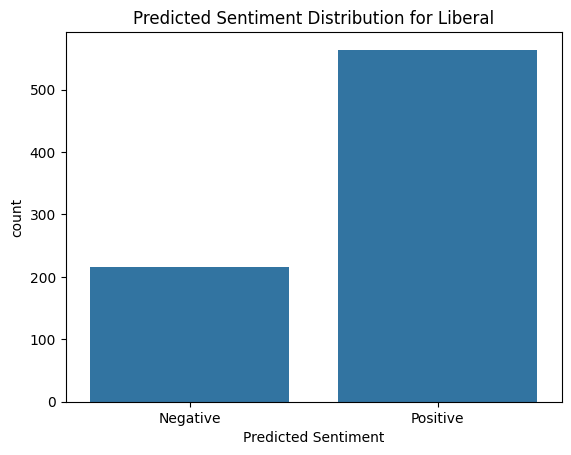

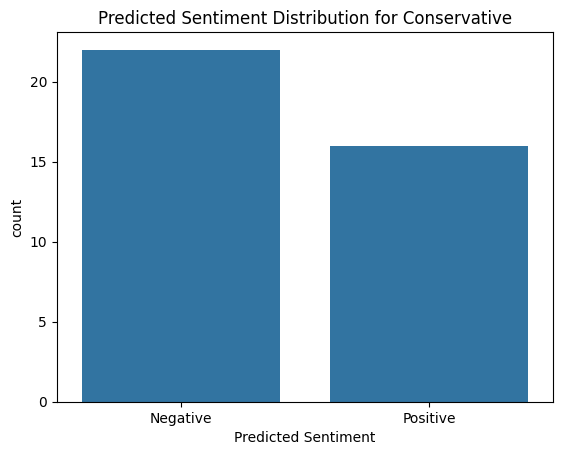

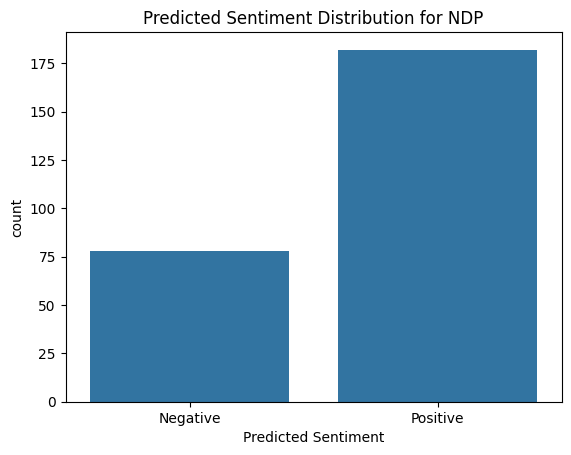

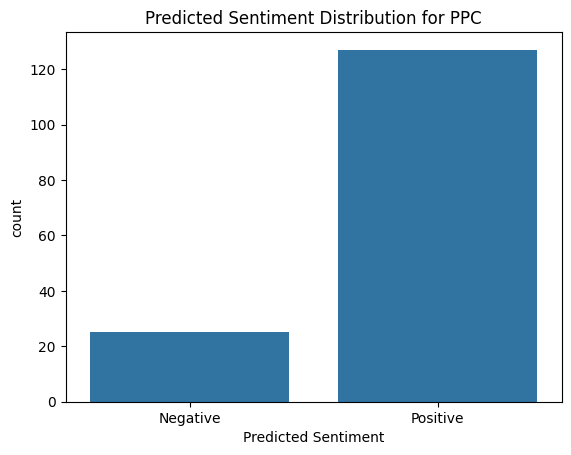

In [ ]:
# Ensure y_train and y_test are integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Initialize and fit TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['text'])
X_ce_tfidf = tfidf_vectorizer.transform(df_sa_3['text'])

# Train the SVM model
svm = LinearSVC()
lm = CalibratedClassifierCV(svm)
lm.fit(X_train_tfidf, y_train)

# Predict sentiments
y_pred = lm.predict(X_ce_tfidf)

# Convert reduced data to a DataFrame
df_reduced_tf = pd.DataFrame(X_ce_tfidf)
df_reduced_tf['Predicted Sentiment'] = y_pred

# Map sentiment labels
sentiment_map = {0: 'Negative', 1: 'Positive'}
df_reduced_tf['Predicted Sentiment'] = df_reduced_tf['Predicted Sentiment'].map(sentiment_map)

# Add party information
df_reduced_tf['Party'] = df_sa_3['Party'].values

# Visualize sentiment distribution for each party
for party in ['Liberal', 'Conservative', 'NDP', 'PPC']:
    df_party = df_reduced_tf[df_reduced_tf['Party'] == party]
    sns.countplot(x='Predicted Sentiment', data=df_party, order=['Negative', 'Positive'])
    plt.title(f"Predicted Sentiment Distribution for {party}")
    plt.show()


Based on the data generated using my simple vote classification function, I observed that the sentiment distribution shows a higher proportion of positive sentiment across three parties except for Conservative party. For the major Party Liberal, the predicted positive and negative sentiments are quite close. This suggests that my model may require further refinement. Additionally, the simple classification function itself needs improvement, as it directly influences the classification results for each party.  

Overall, the performance of my selected model demonstrates strong predictive capability, as evidenced by the figures. One potential enhancement could involve utilizing an SVM trained on non-truncated data. While this approach may require more time, it could capture a greater variance in the data, resulting in a more comprehensive and reliable model.

**4.2)** Split the negative Canadian elections tweets into training data (80%) and test data (20%). Use the true sentiment labels in the Canadian elections data instead of your predictions from the previous part. Choose one algorithms from classification algorithms (choose any model from logistic regression, k-NN, Naive Bayes, SVM, decision trees, RF, XGBoost), train multi-class classification model to predict the reason for the negative tweets. Tune the hyperparameters and chose the model with best score to test your prediction reason for negative sentiment tweets.

In [ ]:
# Data splitting
df_ce_3 = df_ce.copy()
df_ce_3.loc[df_ce_3['sentiment'] == 'negative', 'sentiment'] = 0
df_ce_3.loc[df_ce_3['sentiment'] == 'positive', 'sentiment'] = 1
y = df_ce_3['sentiment']
df_ce_3[df_ce_3['sentiment'] == 0]

,text,sentiment,negative_reason
0,canadian elect power grab pm trudeau ye take a...,0,calling election early
1,hope trudeau lose canadian elect tomorrow call...,0,covid
3,canadian friend never forget trudeau 2 year ma...,0,calling election early
5,vaccin amp gun key elect otool seriou plan get...,0,covid
6,im sorri moder respond leadership candid cant ...,0,others
...,...,...,...
997,absolut horribl canada forthcom elect doubt re...,0,others
998,davidakin trudeau impos gun control polici utt...,0,gun control
999,canada elect stolen thug uneduc goon demand de...,0,others
1000,otool amend platform gun control question rema...,0,tell lies


In [ ]:
# Using random forest

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

negative_tweets = df_ce_3[df_ce_3['sentiment'] == 0]
X = negative_tweets['text']
y = negative_tweets['negative_reason']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)


model = RandomForestClassifier(random_state=0)

# Hyperparameter Tuning using GridSearchCV
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_bow, y_train)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_bow)

# Print Results
print("Best Model Parameters:", grid_search.best_params_)
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Model Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy on Test Set: 0.5384615384615384


**a. Provide a few reasons why your model may fail to predict the correct negative reasons. Back up your reasoning with examples from the test sets.**  


By employing a Random Forest model, I achieved an accuracy of 0.5384615384615384 on the test set. The reason is the limited amount of data available in the dataset, which likely hinders the model's ability to learn detailed and generalizable patterns. For example, there are a lot of unclear data like "others" in the data. Insufficient data often leads to overfitting or poor performance on unseen samples. Another significant challenge is the complexity of the task. Identifying the reasons behind negative sentiment from textual data is inherently difficult due to the nuances of language, such as context, and ambiguity. This task may require a more advanced model.

**b. Suggest one way you can improve the accuracy of your selected model.**

I suggest to use a combination of prediction models instead of using just one single model. Stacking is an ensemble learning technique where predictions from multiple base models (level-1 learners) are combined using a meta-model (level-2 learner) to improve classification performance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# Define base models for stacking
base_models = [
    ('rf_clf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svc', SVC(probability=True, kernel='linear', C=1)),
    ('gb_clf', GradientBoostingClassifier(n_estimators=10, random_state=42))
]


meta_model = LogisticRegression()
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Prepare the data
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
negative_tweets = df_ce_3[df_ce_3['sentiment'] == 0]
X = tfidf_vectorizer.fit_transform(negative_tweets['text'])
y = negative_tweets['negative_reason']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
stacking_clf.fit(X_train, y_train)
y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.46153846153846156


Three models are used to be combined.    
Random Forest (a strong decision-maker based on trees)     
SVM (focuses on finding the best boundary between classes)   
Gradient Boosting (corrects mistakes step-by-step)   
A logistic regression model acts like a coach. It learns how to best combine the predictions from these models to make a better final decision.
The combined approach predicts the sentiment of the text, and the accuracy is calculated to see how well the final model performs.

**c. Combine similar reasons into fewer categories, as long as you justify your reasoning. You are free to define input features of your model using word frequency analysis or other techniques.**

In [ ]:
df_ce_neg = df_ce_3.loc[df_ce_3['sentiment'] == 0]
df_ce_neg['negative_reason'].value_counts()

,count
negative_reason,
others,149
calling election early,73
tell lies,61
covid,25
economy,20
gun control,16
climate problem,15
scandal,14
healthcare and marijuana,7


In [ ]:
# Function to combine negative reasons into broader categories
def categorize_negative_reason(reason):
    if reason in ['healthcare and marijuana', 'covid ']:
        return 'Public Sanitation'
    elif reason in ['calling election early', 'tell lies', 'scandal']:
        return 'Political Reasons'
    elif reason in ['gun control', 'women reproductive rights and racism', 'segregation']:
        return 'Social Concerns'
    elif reason in ['others', 'economy', 'climate problem']:
        return 'Others'
    else:
        return 'Unknown'  # Default category for unmatched cases

df_ce_neg['Negative Reason New'] = df_ce_neg['negative_reason'].fillna('Unknown').apply(categorize_negative_reason)

<ipython-input-145-65edd63d936b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ce_neg['Negative Reason New'] = df_ce_neg['negative_reason'].fillna('Unknown').apply(categorize_negative_reason)


In [ ]:
# Apply the technique of my step b idea of combining different models together and using broader categories for data training.
X_neg = df_ce_neg['text']
y_neg = df_ce_neg['Negative Reason New']
X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(X_neg, y_neg, test_size=0.2, random_state=0)

# Prepare the data using TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_neg)
X_test_tfidf = tfidf_vectorizer.transform(X_test_neg)

#base models for stacking
base_models = [
    ('rf_clf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svc', SVC(probability=True, kernel='linear', C=1)),
    ('gb_clf', GradientBoostingClassifier(n_estimators=10, random_state=42))
]

meta_model = LogisticRegression()
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)
stacking_clf.fit(X_train_tfidf, y_train_neg)
y_pred = stacking_clf.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test_neg, y_pred)
print(f'Accuracy: {accuracy}')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.6282051282051282
